In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [4]:
from tqdm import tqdm_notebook

In [5]:
html = 'https://land.naver.com/news/headline.nhn?bss_ymd=20200{mon}{num}'

In [31]:
budongsan = []

In [42]:
for m in range(1,8,1):
    for n in tqdm_notebook(range(1, 30, 1)):  # progress bar를 만들어주는 라이브러리 사용 
                                                        # range(1페이지에서 100페이지까지 1페이지씩)
        response = urlopen(html.format(mon=m,num=n))
        soup = BeautifulSoup(response, "html.parser")
        tmp = soup.find_all('div', {"id":"container"})
    for line in tmp:
        budongsan.append(line.text)
    time.sleep(0.1)  # progress 오류 방지

In [62]:
tmp = soup.find_all('div', {"id":"container"})

In [44]:
len(budongsan)

31

In [45]:
import nltk  # ex) 말뭉치에서 추출한 단어의 빈도수
from konlpy.tag import Twitter  # konlpy : 말뭉치에서 한국어 단어를 추출

In [46]:
t = Twitter()
budongsan_text = ''
for each_line in budongsan:
    budongsan_text = budongsan_text + each_line + '\n'
tokens_ko = t.morphs(budongsan_text)
ko = nltk.Text(tokens_ko, name='부동산')

In [47]:
len(ko.tokens)

47368

In [48]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import gensim
from gensim.models import word2vec  # 구글의 라이브러리

In [49]:
results = []
stop = ['Foreign','Punctuation','Josa','Alpha','Number','URL','Modifier','Adverb','Determiner','Verb','Adjective']

In [61]:
lines = budongsan

for line in lines:
    malist = t.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        if not word[1] in stop:
            r.append(word[0])
    r1 = (" ".join(r)).strip()
    results.append(r1)

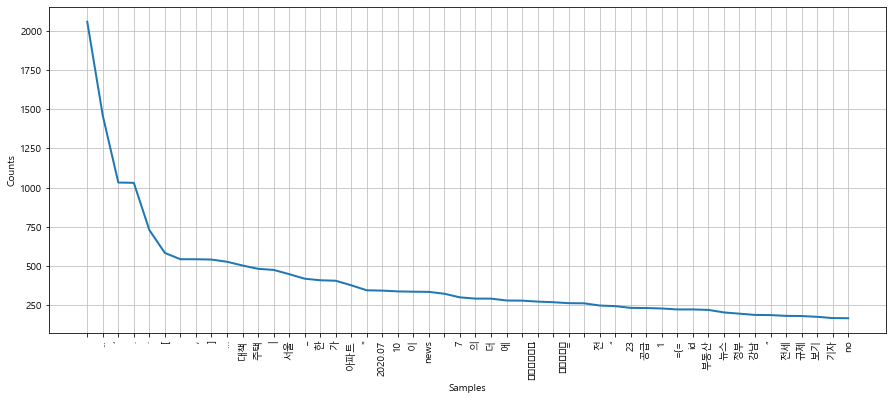

In [59]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [53]:
data_file = 'ddang.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(results))

In [54]:
data = word2vec.LineSentence(data_file)
data

In [55]:
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=3, sg=1)
model.save('ddang.model')

In [56]:
model = word2vec.Word2Vec.load('ddang.model')
model

In [57]:
model.most_similar(positive='부동산')

[('논란', 0.5762451887130737),
 ('전세', 0.5709174275398254),
 ('영', 0.5609559416770935),
 ('혼돈', 0.5324075222015381),
 ('규제', 0.5140323638916016),
 ('서울시', 0.5109443068504333),
 ('대출', 0.5107619166374207),
 ('잘', 0.5089612007141113),
 ('국', 0.4746972918510437),
 ('조선', 0.4720406234264374)]

In [60]:
model.most_similar(positive='대책')

[('전', 0.7058918476104736),
 ('열흘', 0.6708698272705078),
 ('다세', 0.6665921807289124),
 ('일단', 0.6522310376167297),
 ('부동산대책', 0.6325895190238953),
 ('이슈', 0.6307989358901978),
 ('더', 0.6278631091117859),
 ('김현미', 0.627470076084137),
 ('불', 0.6153539419174194),
 ('보기', 0.5978909730911255)]